In [ ]:
import os
import pickle
import string
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import concatenate
from keras.models import Model,load_model
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical,plot_model
from keras.preprocessing.sequence import pad_sequences
from keras.applications.vgg16 import VGG16,preprocess_input
from keras.layers import Input,Dense,LSTM,Embedding,Dropout
from keras.preprocessing.image import img_to_array,load_img
from nltk.translate.bleu_score import sentence_bleu,corpus_bleu
from PIL import Image
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
caption=open("/content/drive/MyDrive/caption.txt","r")
file=caption.read()

In [ ]:
# creating a dictionary for image and its caption
from collections import defaultdict
caption=defaultdict(list)
for line in file.split("\n"):
  line=line.split(":")
  if len(line)>1:
    image=line[0].strip()
    image_caption=line[1].strip()
    image_id=image.split(".")[0][1:]
    caption[image_id].append(image_caption)


In [ ]:
 features = {}

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
import os

def extract_features(directory, caption_dict,count):
    # Load the VGG model
    vgg_model = VGG16(weights="imagenet")

    # Create a model to extract features
    model = Model(inputs=vgg_model.inputs, outputs=vgg_model.layers[-1].output)
    print(model.summary())

    # Image data generator for data augmentation
    datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')


    i = 0
    for name in os.listdir(directory):
        print(i)
        img_id = name.split('.')[0]
        # Load and preprocess original image
        img_path = os.path.join(directory, name)
        original_img = load_img(img_path, target_size=(224, 224))
        original_img = img_to_array(original_img)
        original_img = original_img.reshape((1,) + original_img.shape)
        original_img = preprocess_input(original_img)

        # Extract features from original image
        original_feature = model.predict(original_img, verbose=0)
        features[img_id] = original_feature

        # Update captions for original image
        caption_dict[img_id] = caption_dict.get(img_id, '')

        # Generate and process augmented images
        j = 0
        for batch in datagen.flow(original_img, batch_size=1, shuffle=False):
            j += 1
            if j >= count:  # Generate 9 augmented images per original image
                break

            # Extract features from augmented image
            augmented_img = preprocess_input(batch)
            augmented_feature = model.predict(augmented_img, verbose=0)

            # Store features into dictionary
            features[f'{img_id}_aug_{j}'] = augmented_feature

            # Update captions for augmented image
            caption_dict[f'{img_id}_aug_{j}'] = caption_dict.get(img_id, '')

        i += 1

    return features

In [ ]:
path=r"/content/drive/MyDrive/RoadProblem"
features=extract_features(path,caption,3)

553467096/553467096 [==============================] - 24s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

In [ ]:
path=r"/content/drive/MyDrive/tapwater"
features=extract_features(path,caption,10)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
path=r"/content/drive/MyDrive/leak"
features=extract_features(path,caption,12)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
path=r"/content/drive/MyDrive/lightsout"
features=extract_features(path,caption,25)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
import string

def clean_descriptions(descriptions):
    # prepare translation table for removing punctuation
    table = str.maketrans('', '', string.punctuation)
    for key, desc_list in descriptions.items():
        for i in range(len(desc_list)):
            desc = desc_list[i]
            # tokenize
            desc = desc.split()
            # convert to lower case
            desc = [word.lower() for word in desc]
            # remove punctuation from each token
            desc = [w.translate(table) for w in desc]
            # remove hanging 's' and 'a'
            desc = [word for word in desc if len(word)>1]
            # remove tokens with numbers in them
            desc = [word for word in desc if word.isalpha()]
            # store as string
            desc_list[i] =  ' '.join(desc)

In [ ]:
clean_descriptions(caption)

In [ ]:
caption

defaultdict(list,
            {'03-potholes': ['the road is in shambles and its affecting everyone'],
             '06893d7b-143b-4632-997f-5e8862d0c0a4-large16x9_IMG_9034': ['this road is disaster potholes and cracks are making travel unbearable fix it urgently'],
             '102184617': ['road conditions are appalling the infrastructure needs immediate attention'],
             '102851537-GettyImages-465172040-1': ['this road is disaster potholes and cracks are making travel unbearable fix it urgently'],
             '103824382': ['this road is disaster potholes and cracks are making travel unbearable fix it urgently'],
             '10648444-large': ['the road is in shambles and its affecting everyone'],
             '12BGPOTHOLEKRISHNAPPALAYOUT': ['this road is disaster potholes and cracks are making travel unbearable fix it urgently'],
             '1349379_Wallpaper2 (1)': ['the road is in shambles and its affecting everyone'],
             '13904195286_df4aab890f_z': ['the roa

In [ ]:
caption=dict(caption)
caption

{'03-potholes': ['the road is in shambles and its affecting everyone'],
 '06893d7b-143b-4632-997f-5e8862d0c0a4-large16x9_IMG_9034': ['this road is disaster potholes and cracks are making travel unbearable fix it urgently'],
 '102184617': ['road conditions are appalling the infrastructure needs immediate attention'],
 '102851537-GettyImages-465172040-1': ['this road is disaster potholes and cracks are making travel unbearable fix it urgently'],
 '103824382': ['this road is disaster potholes and cracks are making travel unbearable fix it urgently'],
 '10648444-large': ['the road is in shambles and its affecting everyone'],
 '12BGPOTHOLEKRISHNAPPALAYOUT': ['this road is disaster potholes and cracks are making travel unbearable fix it urgently'],
 '1349379_Wallpaper2 (1)': ['the road is in shambles and its affecting everyone'],
 '13904195286_df4aab890f_z': ['the road is in shambles and its affecting everyone'],
 '1568303816-potholes_getty': ['road conditions are appalling the infrastructur

In [ ]:
len(caption)

3378

In [ ]:
for img,desc in caption.items():


  caption[img][0]='startseq'+' '+desc[0]+' endseq'

In [ ]:
caption

{'03-potholes': ['startseq startseq startseq the road is in shambles and its affecting everyone endseq endseq endseq'],
 '06893d7b-143b-4632-997f-5e8862d0c0a4-large16x9_IMG_9034': ['startseq startseq startseq this road is disaster potholes and cracks are making travel unbearable fix it urgently endseq endseq endseq'],
 '102184617': ['startseq startseq startseq road conditions are appalling the infrastructure needs immediate attention endseq endseq endseq'],
 '102851537-GettyImages-465172040-1': ['startseq startseq startseq this road is disaster potholes and cracks are making travel unbearable fix it urgently endseq endseq endseq'],
 '103824382': ['startseq startseq startseq this road is disaster potholes and cracks are making travel unbearable fix it urgently endseq endseq endseq'],
 '10648444-large': ['startseq startseq startseq the road is in shambles and its affecting everyone endseq endseq endseq'],
 '12BGPOTHOLEKRISHNAPPALAYOUT': ['startseq startseq startseq this road is disaster 

In [ ]:
def to_vocabulary(descriptions):
    # build a list of all description strings
    all_desc = set()
    for key in descriptions.keys():
        [all_desc.update(d.split()) for d in descriptions[key]]
    return all_desc

In [ ]:
vocab=to_vocabulary(caption)

In [ ]:
vocab

{'affecting',
 'again',
 'and',
 'appalling',
 'are',
 'assignments',
 'attention',
 'casuing',
 'causing',
 'complete',
 'completely',
 'concentrate',
 'conditions',
 'cracks',
 'damage',
 'darkness',
 'disaster',
 'dry',
 'due',
 'endseq',
 'everyone',
 'everyones',
 'fix',
 'floors',
 'from',
 'gone',
 'have',
 'help',
 'hostel',
 'hostels',
 'immediate',
 'immediately',
 'in',
 'infrastructure',
 'is',
 'issue',
 'it',
 'its',
 'leakage',
 'leaking',
 'lights',
 'making',
 'need',
 'needed',
 'needs',
 'no',
 'of',
 'on',
 'out',
 'outage',
 'people',
 'potholes',
 'power',
 'road',
 'running',
 'scracity',
 'shambles',
 'slipneed',
 'startseq',
 'studies',
 'taps',
 'the',
 'this',
 'to',
 'travel',
 'unable',
 'unbearable',
 'unexpectedly',
 'urgent',
 'urgently',
 'water',
 'waterfix',
 'we',
 'wet'}

In [ ]:
def to_lines(descriptions):
    all_desc = list()
    for key in descriptions.keys():
        [all_desc.append(d) for d in descriptions[key]]
    return all_desc

In [ ]:
def max_length(descriptions):
    lines = to_lines(descriptions)
    return max(len(d.split()) for d in lines)

In [ ]:
m=max_length(caption)

In [ ]:
def create_tokenizer(descriptions):
    lines = to_lines(descriptions)
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

In [ ]:
tokenizer=create_tokenizer(caption)
vocab_size = len(tokenizer.word_index) + 1
max_length=m
print(vocab_size,m)

75 63


In [ ]:
def data_generator(data_keys, image_to_captions_mapping, features, tokenizer, max_caption_length, vocab_size, batch_size):
    # Lists to store batch data
    X1_batch, X2_batch, y_batch = [], [], []
    # Counter for the current batch size
    batch_count = 0

    while True:
        # Loop through each image in the current batch
        for image_id in data_keys:
            # Get the captions associated with the current image
            captions = image_to_captions_mapping[image_id]

            # Loop through each caption for the current image
            for caption in captions:
                # Convert the caption to a sequence of token IDs
                caption_seq = tokenizer.texts_to_sequences([caption])[0]

                # Loop through the tokens in the caption sequence
                for i in range(1, len(caption_seq)):
                    # Split the sequence into input and output pairs
                    in_seq, out_seq = caption_seq[:i], caption_seq[i]

                    # Pad the input sequence to the specified maximum caption length
                    in_seq = pad_sequences([in_seq], maxlen=max_caption_length)[0]

                    # Convert the output sequence to one-hot encoded format
                    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]

                    # Append data to batch lists
                    X1_batch.append(features[image_id][0])  # Image features
                    X2_batch.append(in_seq)  # Input sequence
                    y_batch.append(out_seq)  # Output sequence

                    # Increase the batch counter
                    batch_count += 1

                    # If the batch is complete, yield the batch and reset lists and counter
                    if batch_count == batch_size:
                        X1_batch, X2_batch, y_batch = np.array(X1_batch), np.array(X2_batch), np.array(y_batch)
                        yield [X1_batch, X2_batch], y_batch
                        X1_batch, X2_batch, y_batch = [], [], []
                        batch_count = 0

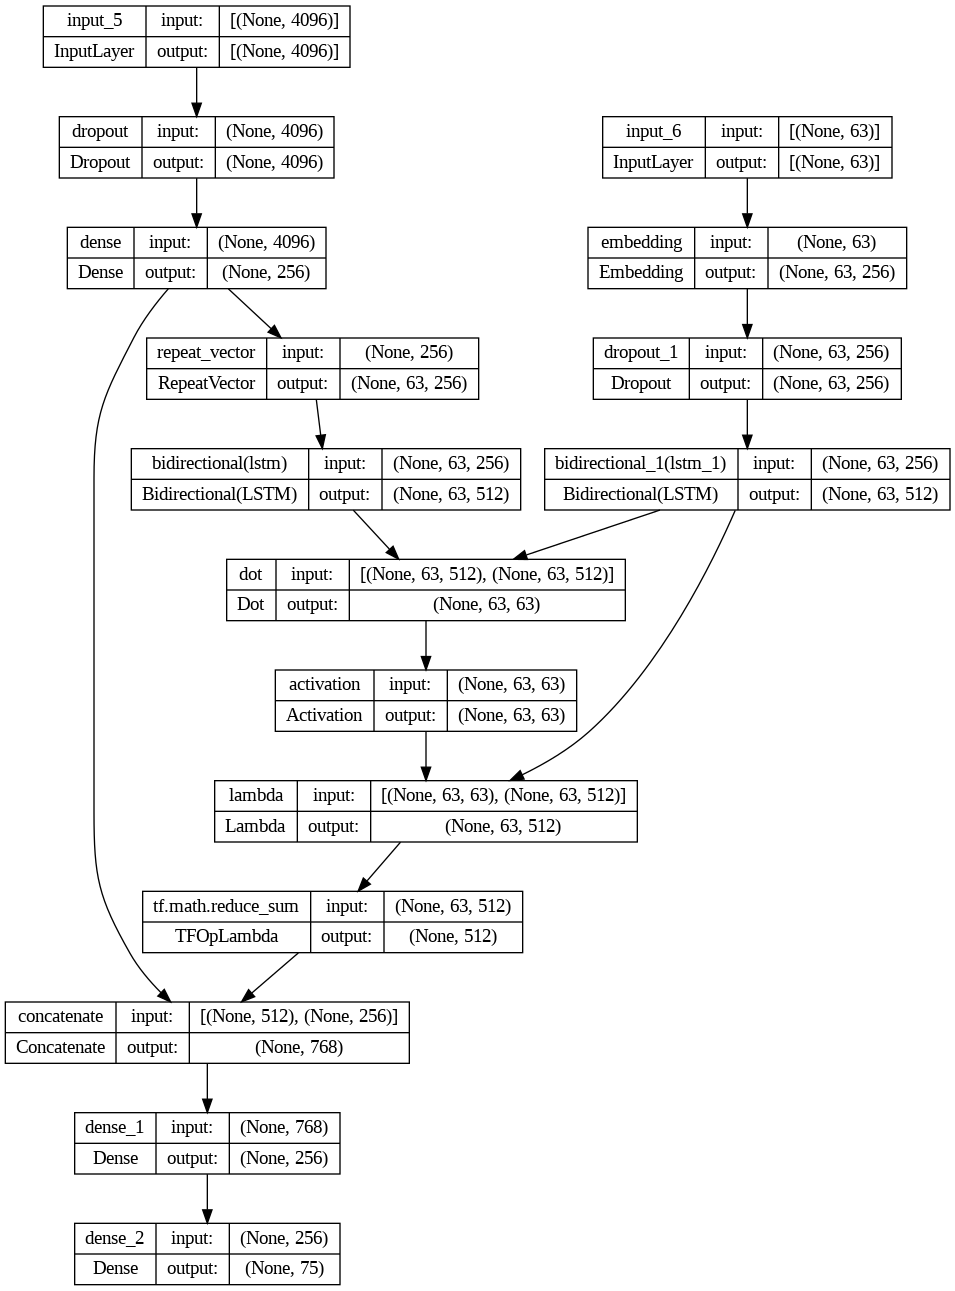

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, concatenate, Bidirectional, Dot, Activation, RepeatVector, Multiply, Lambda
import tensorflow as tf

# Encoder model
inputs1 = Input(shape=(4096,))
fe1 = Dropout(0.5)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)
fe2_projected = RepeatVector(max_length)(fe2)
fe2_projected = Bidirectional(LSTM(256, return_sequences=True))(fe2_projected)

# Sequence feature layers
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.5)(se1)
se3 = Bidirectional(LSTM(256, return_sequences=True))(se2)

# Apply attention mechanism using Dot product
attention = Dot(axes=[2, 2])([fe2_projected, se3])  # Calculate attention scores

# Softmax attention scores
attention_scores = Activation('softmax')(attention)

# Apply attention scores to sequence embeddings
attention_context = Lambda(lambda x: tf.einsum('ijk,ijl->ikl', x[0], x[1]))([attention_scores, se3])

# Sum the attended sequence embeddings along the time axis
context_vector = tf.reduce_sum(attention_context, axis=1)

# Decoder model
decoder_input = concatenate([context_vector, fe2], axis=-1)
decoder1 = Dense(256, activation='relu')(decoder_input)
outputs = Dense(vocab_size, activation='softmax')(decoder1)

# Create the model
model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')

# Visualize the model
plot_model(model, show_shapes=True)

In [ ]:
from math import ceil
import random
random.seed(42)
epochs = 1
batch_size = 50
train=list(caption.keys())
random.shuffle(train)
# Calculate the number of steps per epoch
steps_per_epoch = ceil(len(train) / batch_size)

# Split the dataset into training and validation sets
# Assuming you want to use 20% of the data for validation
num_validation_samples = int(0.2 * len(train))
train_data = train[:-num_validation_samples]
validation_data = train[-num_validation_samples:]

# Loop through the epochs for training
for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")

    # Set up data generators
    train_generator = data_generator(train_data, caption, features, tokenizer, max_length, vocab_size, batch_size)
    validation_generator = data_generator(validation_data, caption, features, tokenizer, max_length, vocab_size, batch_size)

    model.fit(train_generator, epochs=1, steps_per_epoch=steps_per_epoch,
              validation_data=validation_generator, validation_steps=ceil(num_validation_samples / batch_size),
              verbose=1)

Epoch 1/1
68/68 [==============================] - 21s 311ms/step - loss: 0.6792 - val_loss: 0.7716


In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/final_model2')

In [ ]:
def get_word_from_index(index, tokenizer):
    return next((word for word, idx in tokenizer.word_index.items() if idx == index), None)

In [ ]:
def predict_caption(model, image_features, tokenizer, max_caption_length):
    # Initialize the caption sequence
    caption = 'startseq'

    # Generate the caption
    for _ in range(max_caption_length):
        # Convert the current caption to a sequence of token indices
        sequence = tokenizer.texts_to_sequences([caption])[0]
        # Pad the sequence to match the maximum caption length
        sequence = pad_sequences([sequence], maxlen=max_caption_length)
        # Predict the next word's probability distribution
        yhat = model.predict([image_features, sequence], verbose=0)
        # Get the index with the highest probability
        predicted_index = np.argmax(yhat)
        # Convert the index to a word
        predicted_word = get_word_from_index(predicted_index, tokenizer)

        # Append the predicted word to the caption
        caption += " " + predicted_word

        # Stop if the word is None or if the end sequence tag is encountered
        if predicted_word is None or predicted_word == 'endseq':
            break

    return caption

In [ ]:
for key in validation_data:
    # Get actual captions for the current image

    # Predict the caption for the image using the model
    predicted_caption = predict_caption(model, features[key], tokenizer, max_length)
    print(predicted_caption)
    # Split actual captions into words



In [ ]:
len(validation_data)

In [ ]:
def extract_features(image_path):
    # Load the VGG model
    vgg_model = VGG16()

    # Create a model that outputs features from the second-to-last layer
    model = Model(inputs=vgg_model.inputs, outputs=vgg_model.layers[-2].output)

    # Load and preprocess the image
    img = load_img(image_path, target_size=(224, 224))
    img = img_to_array(img)
    img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
    img = preprocess_input(img)

    # Extract features
    feature = model.predict(img, verbose=0)

    return feature

In [ ]:
feature=extract_features(r"/content/road.jpg")

In [ ]:
img = Image.open(r"/content/road.jpg")
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.show()

In [ ]:
max_length=63

In [ ]:
import json
from tensorflow.keras.preprocessing.text import tokenizer_from_json

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to the tokenizer JSON file in Google Drive
file_path = '/content/drive/MyDrive/tokenizer.json'  # Adjust the path as needed

# Load the tokenizer from the JSON file in Google Drive
with open(file_path, 'r') as f:
    tokenizer_json = json.load(f)
    tokenizer = tokenizer_from_json(tokenizer_json)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pickle
file_path = '/content/drive/MyDrive/trained_model.pkl'  # Adjust the path as needed
with open(file_path, 'rb') as f:
    model = pickle.load(f)

In [ ]:

 predicted_caption = predict_caption(model, feature, tokenizer, max_length)
 print(predicted_caption)

startseq startseq startseq road is in shambles and its affecting everyone endseq


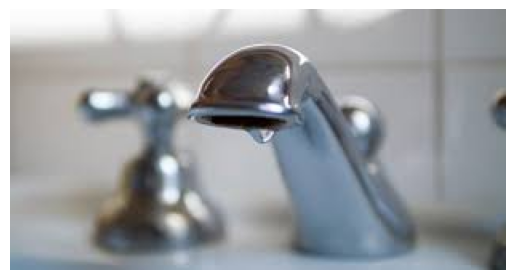

In [ ]:
img = Image.open(r"/content/tap.jpg")

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.show()

In [ ]:
feature=extract_features(r"/content/tap.jpg")
predicted_caption = predict_caption(model, feature, tokenizer, max_length)
print(predicted_caption)

startseq startseq startseq startseq startseq startseq startseq startseq startseq startseq startseq no water from the taps urgent fix needed endseq


In [ ]:
img = Image.open(r"/content/waterleak1.jpg")

plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.show()

In [ ]:
feature=extract_features(r"/content/candle.jpg")
predicted_caption = predict_caption(model, feature, tokenizer, max_length)
print(predicted_caption)

startseq startseq startseq startseq startseq startseq startseq startseq startseq startseq startseq startseq startseq startseq startseq startseq startseq startseq startseq startseq startseq startseq startseq hostel lights have gone out unexpectedly its affecting everyones studies endseq
